In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sklearn
from matplotlib import style
from sklearn import linear_model
from sklearn.utils import shuffle


In [2]:
data = pd.read_csv("student/student-mat.csv", sep=";")

# display the first 10 rows of the data
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Looking at the information the CSV file carries

In [3]:
## Info on our whole data set helps to know missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Trimming down the data to the ones we are actually going to use in this Linear Regression model


In [4]:
data1 = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

# attributes we are going to use here except for the final grade of which we are trying to predict so we will remove it when we are training the model

data1.head(10)

# Tried to pick the ones with interger values associated with them just to make my life easier

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
5,15,15,15,2,0,10
6,12,12,11,2,0,0
7,6,5,6,2,0,6
8,16,18,19,2,0,0
9,14,15,15,2,0,0


### We are going to try to predict "G3" which is Third Grade of a student in the math class 

In [5]:
predict = "G3"  # what we are trying to predict also known as the label

#print(data1["G3"])
data1["G3"].head()


0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

### Creating the Dependent and Independent Variable

In [6]:
x = np.array(data1.drop([predict], axis=1)) # drop method normally drop rows soo the axis parameter is there to specify to drop the column rather
# This is the Independent Variable  WHich is our ATTRIBUTES

y = np.array(data1[predict])
# so what we are trying to predict here is the G3 which will be on the Y-axis of Linear regression model (dependent Variable)
#WHICH IS OUR LABELS

In [7]:
print(x)
print(y)

# they all converted to numpy arrays


[[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 ...
 [10  8  1  3  3]
 [11 12  1  0  0]
 [ 8  9  1  0  5]]
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12
 14 15 11 

### Converting our X & Y variables into 4 parts (X_Train,X_Test) & (Y_Train, Y_Test)

In [8]:
import sklearn.model_selection


# Splitting them up into 4 different arrays

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

### Creating our LinearRegression model and the line of best fit

In [9]:

# SO after training and saving the model with the highest accuracy... we do need to be retraining the model over and over again

# linear = linear_model.LinearRegression()

# linear.fit(x_train,y_train)
# # fitting the model to the data to find the best fit line

### Now Evaluating how good the linear model is doing in terms of Accuracy 

In [10]:
# acc = linear.score(x_test,y_test)

# print("Accuracy of the model is: ", acc)

## Saving our model 

In [11]:

# Saving our model using pickle

# The model has already been trained and saved with accuracy of 0.9168853613210453
# That's why this code is commented out

# with open("studentmodel.pickle", "wb") as f:
#     pickle.dump(linear, f)

In [12]:
# Loading in our Pickle file 

pickle_in = open("studentmodel.pickle", "rb")

linear = pickle.load(pickle_in)


### Now printing the actual Co-efficient of the line (Y = MX + B) in order to actually use this model to predict new data

In [13]:
print("Coefficient: ", linear.coef_) # this is the slope of the line that is the value of the slope of the line (m)


# so basically a line in 2 dimensional space has 2 coefficients, 
# but this has 5 coefficients because we have 5 attributes that we are using to predict the final grade of the students

print("Intercept: ", linear.intercept_) # this is the y-intercept of the line which is the point where the line crosses the y-axis (B)

Coefficient:  [ 0.14719548  0.98653355 -0.21385118 -0.3381347   0.03764733]
Intercept:  -1.4765851835782158


In [14]:
predictions = linear.predict(x_test)

for i in range(len(predictions)):
    print(predictions[i], x_test[i], y_test[i])

# This loop iterates over the range of the length of the predictions array. For each iteration, it prints the predicted value, the corresponding feature set from x_test, and the actual target value from y_test.

# The predicted value is the model’s guess for the final grade of the student. The feature set is the set of attributes that the model used to make the prediction. The actual target value is the real final grade of the student.
 
# KEY : 9.272148547861....(Predicted Value) [G1, G2, studytime, failures, absences] YYY (Actual Value)

3.4330105602363563 [3 5 2 1 8] 5
9.184680397750569 [11  9  1  1 19] 10
14.52992622738154 [15 14  2  1 20] 13
10.713927312594343 [12 11  2  0  0] 12
3.573418408690544 [6 5 2 1 0] 0
7.836408954772029 [10  8  2  0 10] 8
13.058222528931399 [10 13  1  0 12] 12
7.003858527604882 [ 9  7  2  0 18] 6
11.928196136851495 [15 12  3  0  0] 14
8.84406081677133 [10 10  3  2  8] 10
7.459935696708259 [10  8  2  0  0] 9
13.757461567439721 [13 14  3  0  4] 14
19.28208735940911 [18 18  1  1 24] 18
6.974605509545031 [9 8 2 1 0] 0
18.069887565331214 [16 18  3  0  2] 18
14.887796782800777 [15 15  3  0  0] 15
16.45262199327167 [15 16  1  0  4] 15
12.064901343767424 [12 12  1  0  4] 13
15.176942613711343 [15 15  2  0  2] 16
7.018349241803055 [7 8 2 0 0] 0
13.131974683056175 [14 13  2  0  4] 13
11.793033427423543 [14 12  4  0  6] 13
3.914946929142477 [5 5 2 0 4] 6
12.90948454647502 [13 13  2  0  2] 11
16.137861612095175 [15 16  3  0  7] 15
14.060491494659868 [16 14  4  0  6] 15
10.139029469030316 [11 11  4  0  

## PLOTTING THE SCATTER GRAPH TO SEE HOW THINGS LOOK LIKE GRAPHICALLY 

Text(0.5, 1.0, 'Final Grade vs G2')

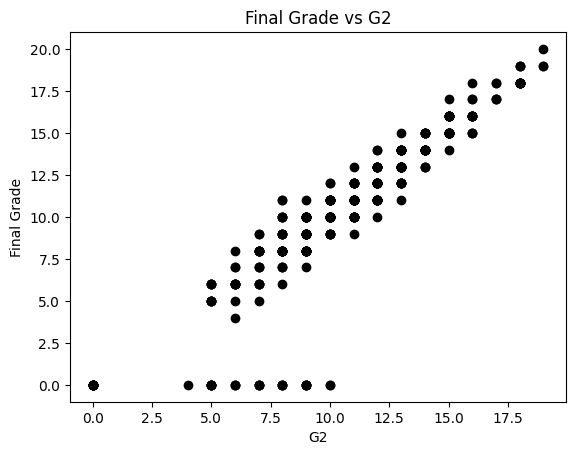

In [15]:
xAxis = "G2"  #G1 and G2 are the most important attributes in predicting the final grade of the students

plt.scatter(data1[xAxis], data1["G3"], marker="o", color="black")
plt.xlabel(xAxis)
plt.ylabel("Final Grade")
plt.title("Final Grade vs " + xAxis)


Text(0.5, 1.0, 'Final Grade vs G1')

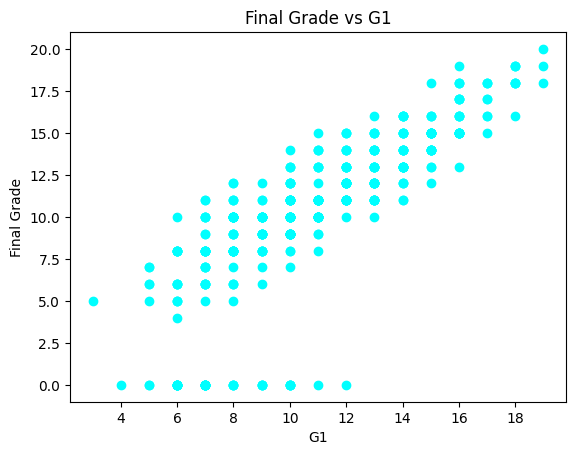

In [16]:
xAxis = "G1"  #G1 and G2 are the most important attributes in predicting the final grade of the students

plt.scatter(data1[xAxis], data1["G3"], marker="o", color="cyan")
plt.xlabel(xAxis)
plt.ylabel("Final Grade")
plt.title("Final Grade vs " + xAxis)
